## 0.0 Importar Pacotes

In [1]:
from matplotlib import gridspec
from datetime import datetime
from ipywidgets import fixed
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import tqdm
import ipywidgets as widgets
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

## 0.1 Funções Auxiliares

In [2]:
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = (11, 7)

warnings.filterwarnings('ignore')

# 1.0 Dados

## 1.1 Importando Dados

In [3]:
df = pd.read_csv('Datasets/kc_house_data.csv')

## 1.2 Dimensão dos Dados

In [4]:
print('Número de linhas é de :', df.shape[0])
print('Número de colunas é de :', df.shape[1])

Número de linhas é de : 21613
Número de colunas é de : 21


## 1.3 Tipos de Variáveis

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4 Alterando os tipos de variáveis

In [6]:
# Alterando a data para o formato de Datetime
df['date'] = pd.to_datetime(df['date'])

# Modificando a coluna yr_renovated para Datetime
df['yr_renovated'] = df['yr_renovated'].replace(0, pd.NaT)
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y')

## 1.5 Criação de novas features

In [7]:
# Criação de coluna para informar se foi construído antes ou depois de 1955
df['bf1955'] = df['yr_built'].apply(lambda x: '>1955' if x > 1955
                                    else '<1955')
# Criação de coluna para informar se possuí porão ou não.
df['basement'] = df['sqft_basement'].apply(lambda x: 'no' if x == 0
                                           else 'yes')
# Criação de colunas para mês e ano.
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Criação de uma nova coluna para informar se imóvel foi reformado ou não
df['renovated'] = df['yr_renovated'].apply(
    lambda x: 'yes' if pd.notnull(x) else 'No')

# Criação de uma nova coluna para informar condição do imóvel
df['condition'] = df['condition'].astype(int)
df['condition_type'] = df['condition'].apply(
    lambda x: 'bad' if x <= 2 else 'regular' if (x == 3) | (x == 4) else 'good')

# Criação de nova coluna para informar estação do ano
df['season'] = df['month'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,bf1955,basement,month,year,renovated,condition_type,season
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,-122.26,1340,5650,<1955,no,10,2014,No,regular,fall
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,-122.32,1690,7639,<1955,yes,12,2014,yes,regular,winter
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,-122.23,2720,8062,<1955,no,2,2015,No,regular,winter
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,-122.39,1360,5000,>1955,yes,12,2014,No,good,winter
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,-122.05,1800,7503,>1955,no,2,2015,No,regular,winter


## 1.5 Limpeza de Dados

## 1.5.1 Verificando Duplicadas

In [8]:
#Verficando se existem linhas duplicadas através do ID do DataFrame
duplicated_column = df['id'].duplicated()
print(duplicated_column.value_counts())

id
False    21436
True       177
Name: count, dtype: int64


In [9]:
#Realizando a exclusão das linhas duplicadas e verificando se foram corretamente excluídas
df = df.drop_duplicates(subset=['id'], keep = 'last')
new_duplicated_column = df['id'].duplicated()
print(new_duplicated_column.value_counts())

id
False    21436
Name: count, dtype: int64


## 1.5.2 Valores Nulos

In [10]:
df.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated      20526
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
bf1955                0
basement              0
month                 0
year                  0
renovated             0
condition_type        0
season                0
dtype: int64

## 1.5.3 Análise Estatística

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bf1955', 'basement',
       'month', 'year', 'renovated', 'condition_type', 'season'],
      dtype='object')

In [12]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21436.00,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,21436.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21436.00,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
sqft_lot,21436.00,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,21436.00,1790.96,829.03,290.00,1200.00,1560.00,2220.00,9410.00
sqft_basement,21436.00,291.74,442.78,0.00,0.00,0.00,560.00,4820.00
yr_built,21436.00,1971.10,29.39,1900.00,1952.00,1975.00,1997.00,2015.00
sqft_living15,21436.00,1988.31,685.70,399.00,1490.00,1840.00,2370.00,6210.00


In [13]:
bed = df[df['bedrooms']==33].index
df = df.drop(bed)
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10], dtype=int64)

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bf1955', 'basement',
       'month', 'year', 'renovated', 'condition_type', 'season'],
      dtype='object')

# 2.0 Exploração de Dados

## 2.1 Correlação

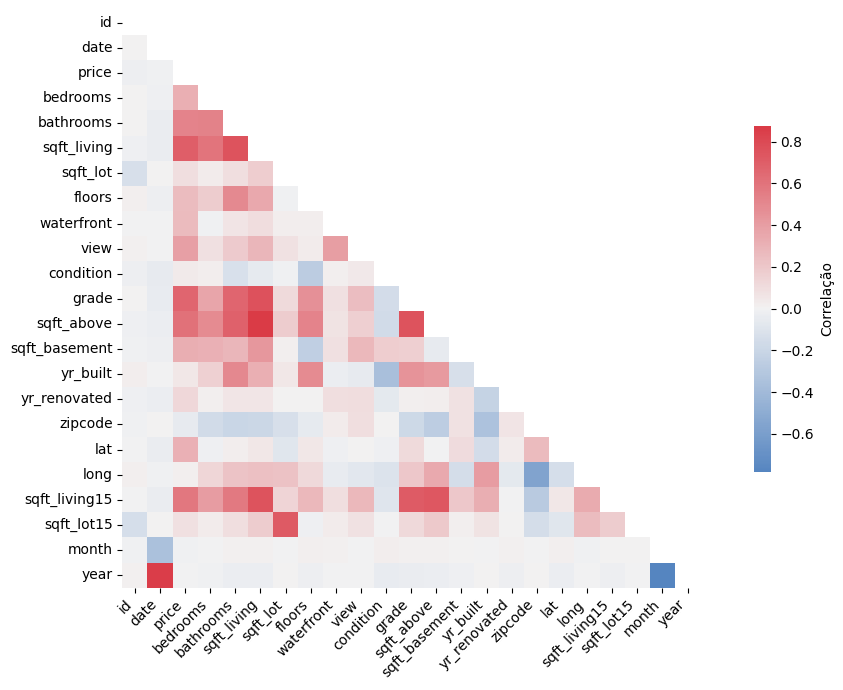

In [42]:
df_heatmap = df.drop(['bf1955','renovated', 'basement','condition_type','season'],axis=1)
matrix = np.triu(df_heatmap.corr())

cmap = sns.diverging_palette(250, 10, as_cmap=True)
ax = sns.heatmap(df_heatmap.corr(), cmap = cmap, square = True, cbar_kws={"shrink": .6}, annot = False, center = 0, mask = matrix);

# Rotacione as legendas dos eixos x e y em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adicione uma legenda
cbar = ax.collections[0].colorbar
cbar.set_label('Correlação')

plt.subplots_adjust(bottom=0.15, left=0.15)
plt.tight_layout()        

# 3.0 Insights

In [43]:
df =  df.copy()

In [44]:
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int32
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated      datetime64[ns]
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
bf1955                    object
basement                  object
month                      int32
year                       int32
renovated                 object
condition_type            object
season                    object
dtype: object

## H1: Imóveis com a vista para a água são peloo menos 30% mais caros.

,waterfront,price,price_divided
0,0,533061.43,NaN
1,1,1661876.02,3.12


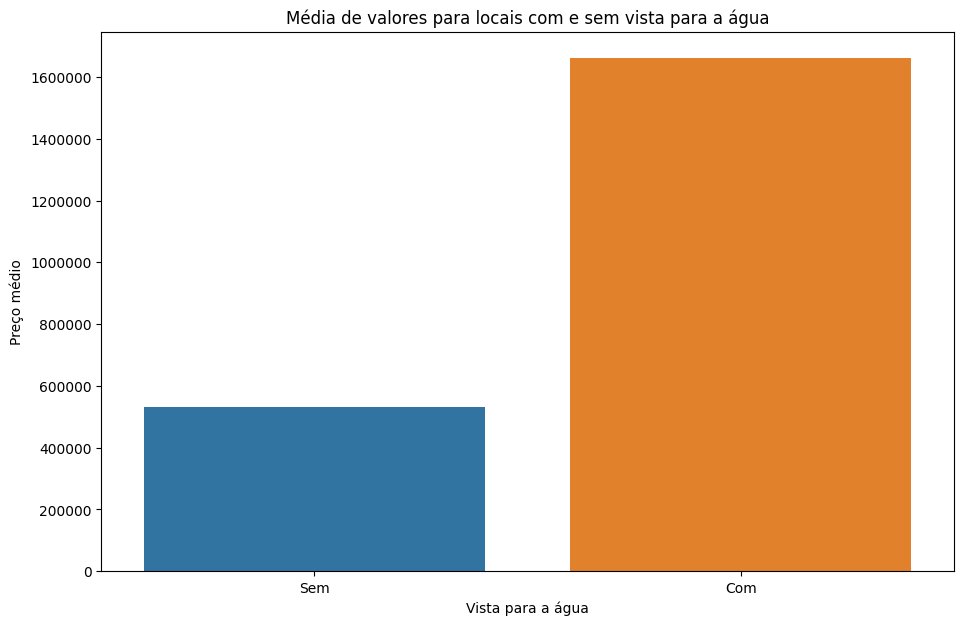

In [45]:
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
sns.barplot(x = h1['waterfront'], y = h1['price'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(h1['waterfront'], ['Sem','Com'])
plt.title('Média de valores para locais com e sem vista para a água')
plt.xlabel('Vista para a água')
plt.ylabel('Preço médio')


h1['price_divided'] = h1['price'] / h1['price'].shift()
h1.head()

## H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos

,bf1955,price,price_divided
0,<1955,536359.76,NaN
1,>1955,543873.83,1.01


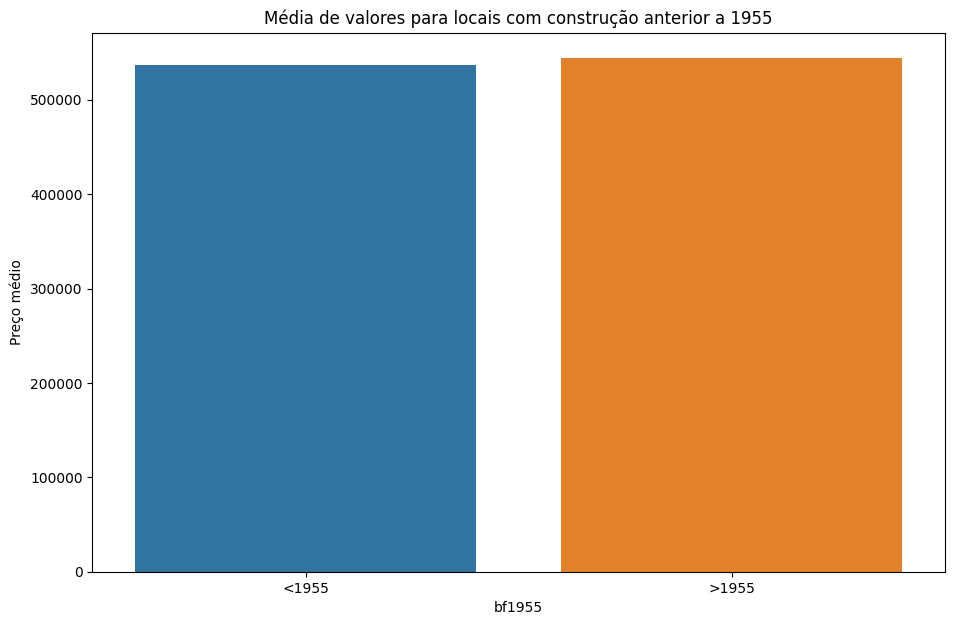

In [46]:
h2 = df[['bf1955', 'price']].groupby('bf1955').mean().reset_index()

sns.barplot(x = h2['bf1955'], y = h2['price'])
plt.ticklabel_format(style='plain', axis='y')

plt.title('Média de valores para locais com construção anterior a 1955')
plt.ylabel('Preço médio')


h2['price_divided'] = h2['price'] / h2['price'].shift()
h2.head()

## H3: Imóveis sem porão poussem área total (sqrt_lot) pelo menos 50% maiores do que imóveis com porão

,basement,sqft_lot,sqft_proportion
0,no,16325.93,NaN
1,yes,13296.86,0.81


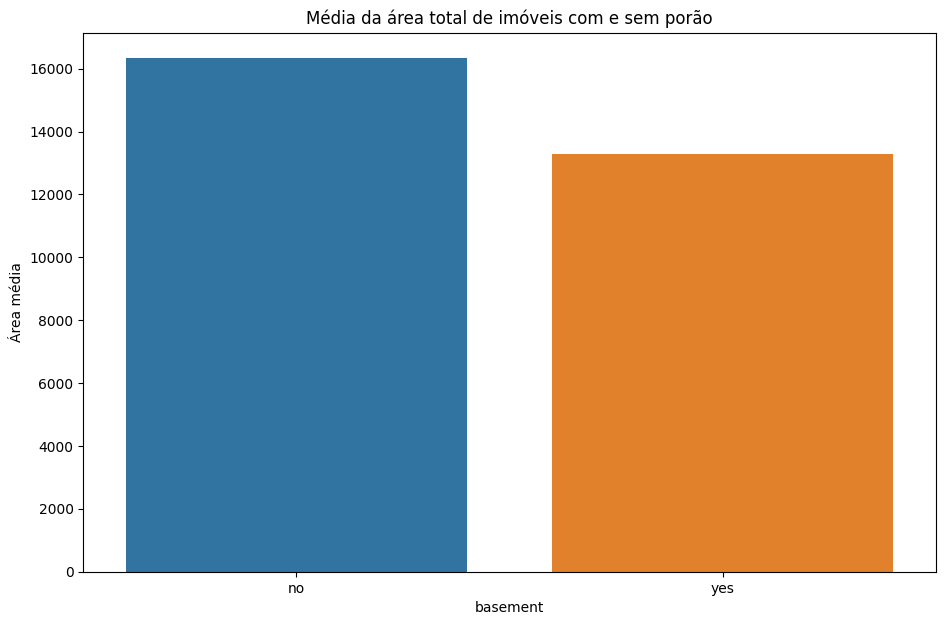

In [47]:
h3 = df[['basement','sqft_lot']].groupby('basement').mean().reset_index()

sns.barplot(x = h3['basement'], y = h3['sqft_lot'])
plt.ticklabel_format(style='plain', axis='y')

plt.title('Média da área total de imóveis com e sem porão')
plt.ylabel('Área média')


h3['sqft_proportion'] = h3['sqft_lot'] / h3['sqft_lot'].shift()
h3.head()

## H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%

,year,price,price_divided
0,2014,541327.75,NaN
1,2015,542304.27,1.00


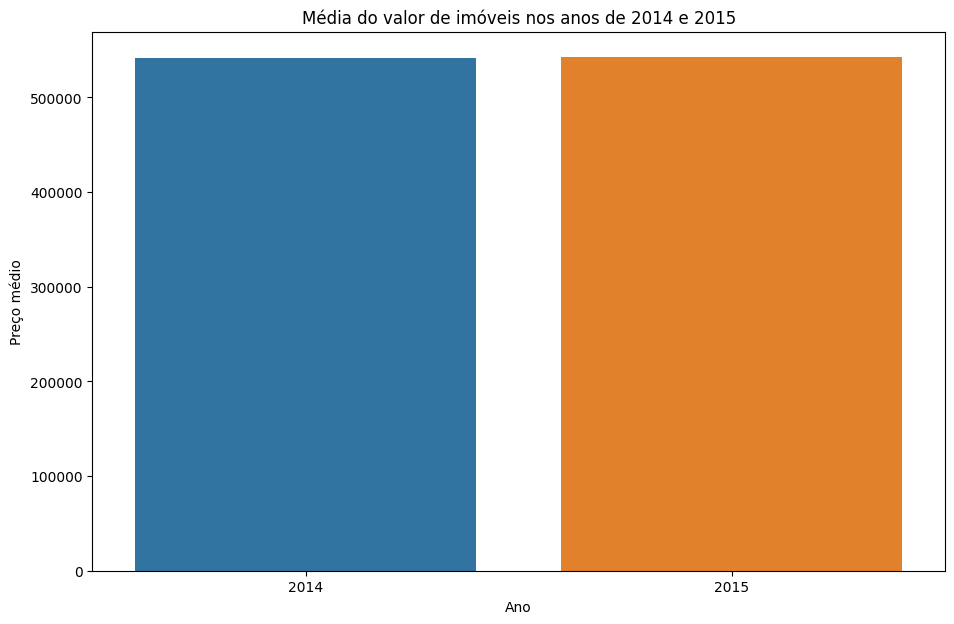

In [48]:
h4 = df[['year', 'price']].groupby('year').mean().reset_index()

sns.barplot(x = h4['year'], y = h4['price'])
plt.ticklabel_format(style='plain', axis='y')

plt.title('Média do valor de imóveis nos anos de 2014 e 2015')
plt.ylabel('Preço médio')
plt.xlabel('Ano')


h4['price_divided'] = h4['price'] / h4['price'].shift()
h4.head()

## H5: Imóveis com 3 banheiros tem um crescimento MoM de 15%

,month,price,Diferenca_Perc
0,1,672923.17,NaN
1,2,696714.42,3.54
2,3,768495.10,10.30
3,4,709751.99,-7.64
4,5,691097.63,-2.63


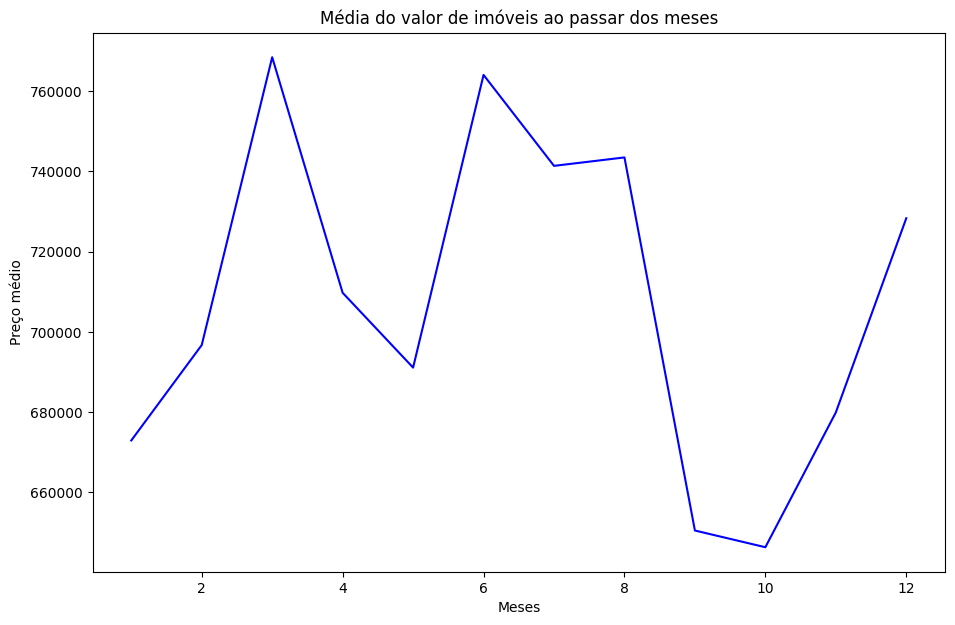

In [49]:
h5 = df[df['bathrooms']==3]
h5 = h5[['month','price']].groupby('month').mean().reset_index()

sns.lineplot(data = h5, x = 'month',y='price', markers = True, color = 'b')
plt.title('Média do valor de imóveis ao passar dos meses')
plt.ylabel('Preço médio')
plt.xlabel('Meses')

h5['Diferenca_Perc'] = h5['price'].pct_change() * 100
h5.head()

## H6: Imóveis com data de construção inferior a 1955 e  reformados são 50% mais baratos, comparado aos não reformados

0    NaN
1   0.70
Name: price, dtype: float64


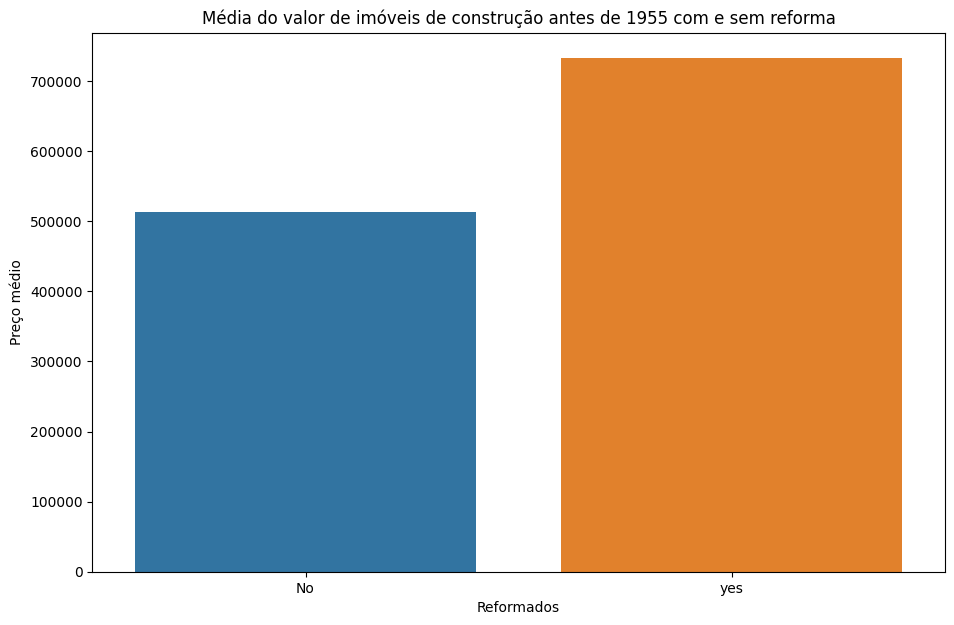

In [50]:
h6 = df[df['bf1955'] == '<1955']
h6 = h6[['renovated','price']].groupby(['renovated']).mean().reset_index()

sns.barplot(x = h6['renovated'], y = h6['price'])
plt.ticklabel_format(style='plain', axis='y')

plt.title('Média do valor de imóveis de construção antes de 1955 com e sem reforma')
plt.ylabel('Preço médio')
plt.xlabel('Reformados')


price_divided = h6['price'].shift() / h6['price']
print(price_divided)
#O imóvel é 30% mais barato

## H7: Imóveis em boas condições e com vista para água são 20% mais caros em comparação aos em más condições e com vista para água

0   0.98
Name: price, dtype: float64
0   1579049.60
Name: price, dtype: float64
0   1606500.00
Name: price, dtype: float64


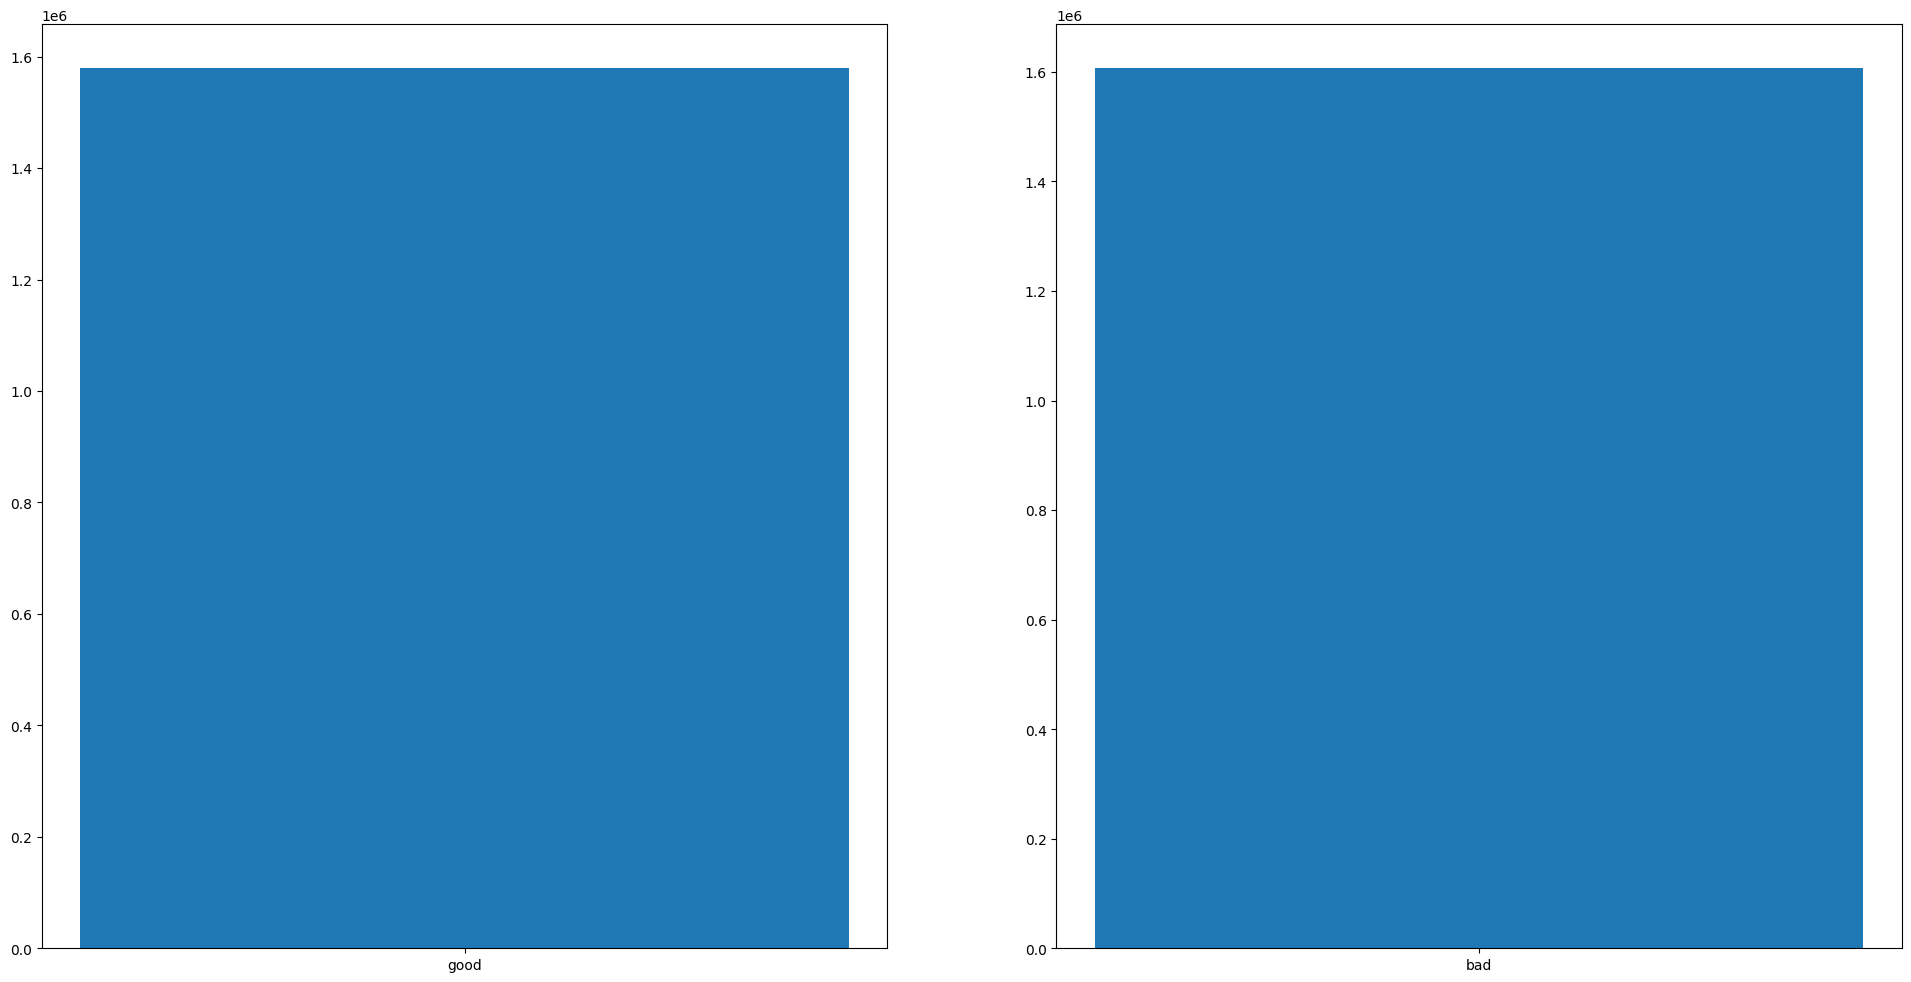

In [51]:
h7 = df[['price','waterfront','condition_type']].groupby(['waterfront','condition_type']).mean().reset_index()

good_water = h7[(h7['condition_type']=='good') & (h7['waterfront']==1)].reset_index()
bad_water =h7[(h7['condition_type']=='bad') & (h7['waterfront']==1)].reset_index()

print(good_water['price']/bad_water['price'])

fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec( ncols=2, nrows=1, figure=fig )

ax1 =fig.add_subplot( specs[0, 0] ) # First Row
ax2 =fig.add_subplot( specs[0,1] )

ax1.bar(good_water['condition_type'], good_water['price'])
ax2.bar(bad_water['condition_type'], bad_water['price'])

print(good_water['price'])
print(bad_water['price'])

## H8: Imóveis em boas condições e com vista para água são pelo menos 10% mais caros em comparação aos em boas condições e sem vista para água

,waterfront,price,price_divided
0,0,601515.65,NaN
1,1,1579049.60,2.63


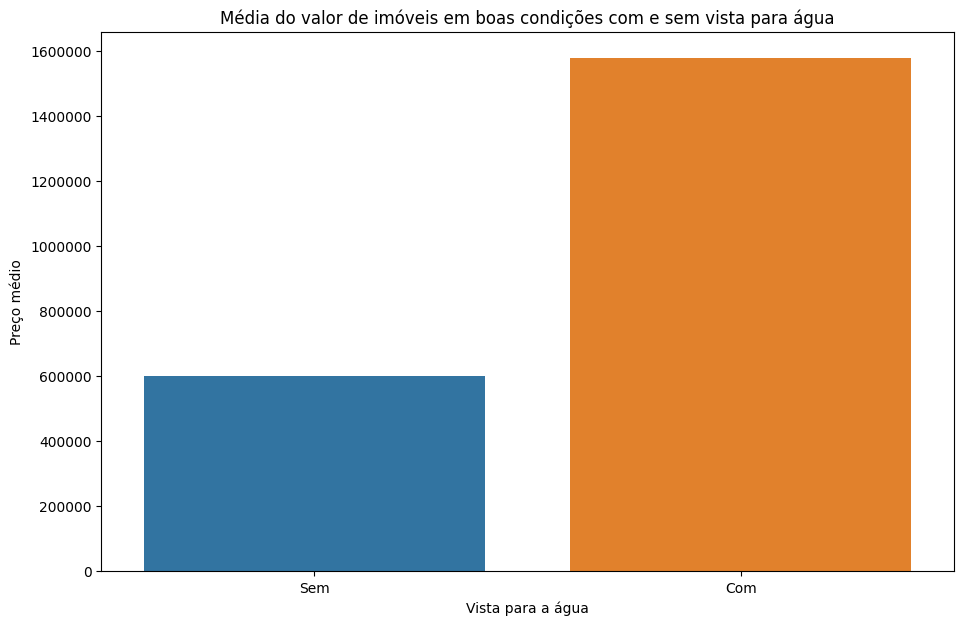

In [52]:
h8 = df[df['condition_type'] == 'good']

h8 = h8[['price','waterfront']].groupby('waterfront').mean().reset_index()

sns.barplot(x = h8['waterfront'], y = h8['price'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(h8['waterfront'], ['Sem','Com'])
plt.title('Média do valor de imóveis em boas condições com e sem vista para água')
plt.ylabel('Preço médio')
plt.xlabel('Vista para a água')


h8['price_divided'] = h8['price'] / h8['price'].shift()

h8.head()

## H9: Imóveis que nunca foram reformados são pelo menos 10% mais baratos que os não reformados

0    NaN
1   0.70
Name: price, dtype: float64


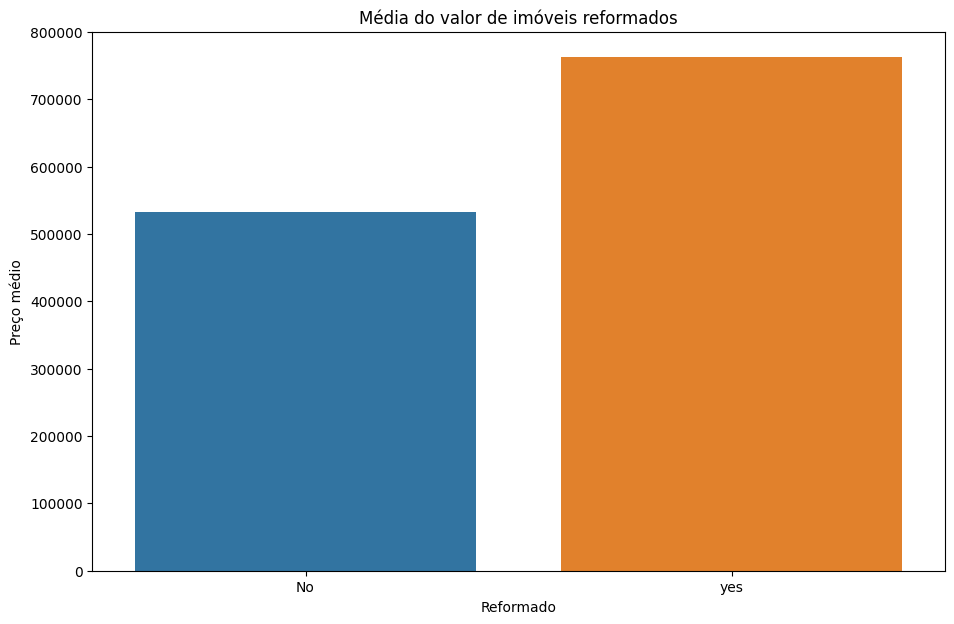

In [53]:
h9 = df[['renovated','price']].groupby('renovated').mean().reset_index()

sns.barplot(x = h9['renovated'], y = h9['price'])
plt.ticklabel_format(style='plain', axis='y')

plt.title('Média do valor de imóveis reformados')
plt.ylabel('Preço médio')
plt.xlabel('Reformado')


print(h9['price'].shift()/h9['price'])

## H10: Imóveis construídos antes de 1955 possuem mais banheiros

In [54]:
h10 = df[['bathrooms','bf1955']].groupby('bf1955').mean()


print(h10)


        bathrooms
bf1955           
<1955        1.62
>1955        2.33


# 3.0 Questão de Negócio

## 3.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

In [55]:
df = df.copy()

df1 = df[['zipcode','price']].groupby('zipcode').median().reset_index()

df2 = pd.merge(df1,df, on='zipcode', how = 'inner')

df2 = df2.rename(columns = {'price_y':'price', 'price_x':'price_median'})

for i, row in df2.iterrows():
    if (row['price_median']>= row['price']) & (row['condition_type'] == 'good'):
        df2.loc[i,'buy'] = 'yes'
    else:
        df2.loc[i,'buy'] = 'no'

In [56]:
buy = df2[df2['buy']=='yes']

buy['buy'].shape[0]
buy[['id','price','buy']]

,id,price,buy
7,3353401710,227950.00,yes
17,3353400860,249900.00,yes
41,303000445,175000.00,yes
50,3750605349,210500.00,yes
66,1311000600,250000.00,yes
...,...,...,...
21288,6822100030,589000.00,yes
21374,8127700210,600000.00,yes
21390,2771104010,529999.00,yes
21405,7010701383,680000.00,yes


In [57]:
id_bar = widgets.Dropdown(
        options = df2['buy'].unique().tolist(),
        descriptiono = 'region',
        disabled = False)


In [58]:
def update_map(df3, id_bar):
    house = df2[(df2['buy'] == id_bar)][['id', 'lat', 'long', 'condition', 'buy', 'price']]
    
    mapa = px.scatter_mapbox(house, lat = 'lat',lon = 'long',
                            size = 'price',
                            color = 'condition',
                            opacity = 0.5,
                            zoom = 10)
    
    mapa.update_layout(mapbox_style = 'open-street-map')
    mapa.update_layout(height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
    mapa.show()
    
widgets.interactive(update_map, df3 = fixed(df2), id_bar = id_bar)

interactive(children=(Dropdown(description='id_bar', options=('no', 'yes'), value='no'), Output()), _dom_class…

## 3.2 Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço ?

In [59]:
df3 = df2.copy()

In [60]:
df3 = df3[df3['buy']=='yes']

In [61]:
df4 = df3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

df4 = df4.rename(columns = {'price' : 'price_m_season', 'season': 'season_median'} ) 

df5 = pd.merge(df3, df4, on='zipcode', how = 'inner')

df5['sale'] = df5.apply(lambda row: row['price'] * 1.1 if row['price_m_season'] > row['price'] else row['price'] * 1.3, axis=1)

df5 = df5.drop_duplicates(subset='id')

In [62]:
df5[['season', 'price', 'id', 'sale']].head(20)

,season,price,id,sale
0,fall,227950.00,3353401710,250745.00
4,summer,249900.00,3353400860,324870.00
8,winter,175000.00,303000445,192500.00
12,spring,210500.00,3750605349,231550.00
16,fall,250000.00,1311000600,325000.00
20,summer,254000.00,321049090,330200.00
24,summer,170000.00,4463400195,187000.00
28,fall,240000.00,3750603940,312000.00
32,winter,246900.00,7905400160,320970.00
36,spring,247000.00,1311000270,321100.00


<Axes: xlabel='season', ylabel='sale'>

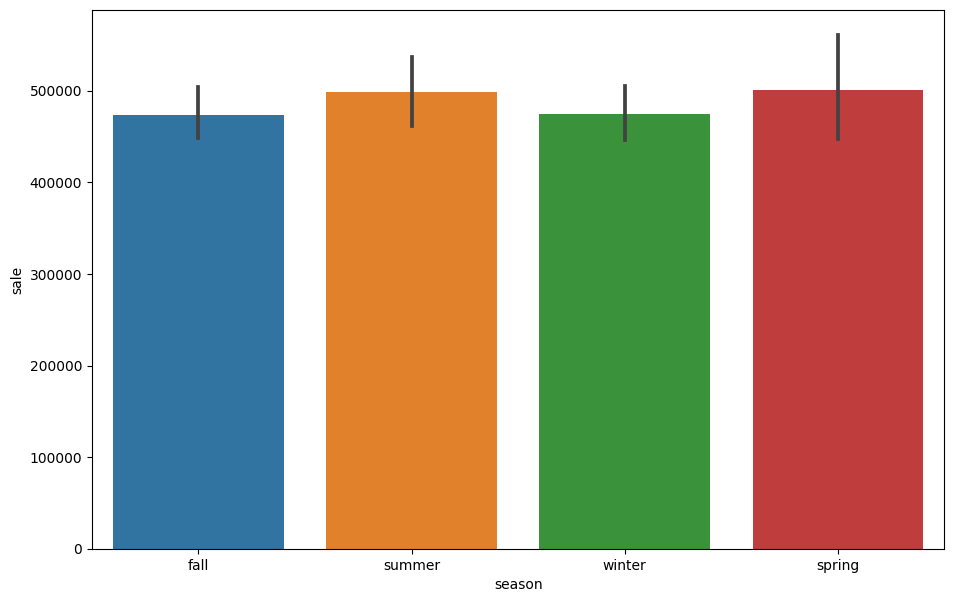

In [63]:
sns.barplot(data = df5, x = 'season',y='sale')

# 4.0 Resultados para o negócio

In [64]:
df5['profit'] = df5['sale'] - df5['price']

In [65]:
print("Com a compra e venda dos imóveis a empresa irá lucrar {:.2f}".format(df5['profit'].sum()))

Com a compra e venda dos imóveis a empresa irá lucrar 63061590.80


# 5.0 Resultados dos teste das hipóteses

In [66]:
hipoteses = [['Hipótese','Validação','Resultado'],
            ['H1','Verdadeiro','Os imóveis com vista para a água são em média 212% mais caros.'],
            ['H2','Falso','O ano de construção dos imóveis não parece influenciar diretamente no preço.'],
            ['H3','Falso','Os imóveis sem porão possuem área total maior, porém em média de 20% maior.'],
            ['H4','Falso','O crescimento da média de preço dos imóveis é inferior a 1%.'],
            ['H5','Falso','O preço dos imóveis varia de acordo com o mês, em momentos ocorrendo um aumento em outros uma redução.'],
            ['H6','Falso','Os imóveis com data de construção inferior a 1955 e reformados são na verdade 30% mais baratos.'],
            ['H7','Falso','Os imóveis em más condições e com vista para água são 2% mais caros, comparados aos em boas condições.'],
            ['H8','Verdadeiro','Comparando imóveis em boas condições, os que possuem vista para água são em média 163% mais caros.'],
            ['H9','Verdadeiro','Os imóveis não reformado são em média 30% mais baratos.'],
            ['H10','Falso','Imóveis após o ano de 1955 possuem mais banheiros.']]


print(tabulate(hipoteses, headers='firstrow'))

Hipótese    Validação    Resultado
----------  -----------  ------------------------------------------------------------------------------------------------------
H1          Verdadeiro   Os imóveis com vista para a água são em média 212% mais caros.
H2          Falso        O ano de construção dos imóveis não parece influenciar diretamente no preço.
H3          Falso        Os imóveis sem porão possuem área total maior, porém em média de 20% maior.
H4          Falso        O crescimento da média de preço dos imóveis é inferior a 1%.
H5          Falso        O preço dos imóveis varia de acordo com o mês, em momentos ocorrendo um aumento em outros uma redução.
H6          Falso        Os imóveis com data de construção inferior a 1955 e reformados são na verdade 30% mais baratos.
H7          Falso        Os imóveis em más condições e com vista para água são 2% mais caros, comparados aos em boas condições.
H8          Verdadeiro   Comparando imóveis em boas condições, os que possuem vista